In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt 

In [5]:
%matplotlib inline

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import svm

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
df=pd.read_csv('Loan.csv')

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [17]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [18]:
df.replace({'Dependents':{'3+':3}},inplace=True)

In [19]:
df['Dependents'].value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

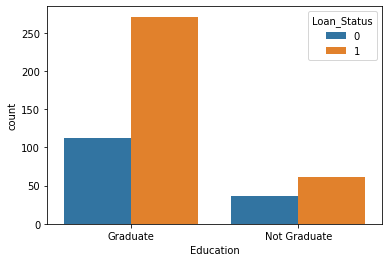

In [20]:
sns.countplot(data=df,x='Education',hue='Loan_Status')

<AxesSubplot:xlabel='Married', ylabel='count'>

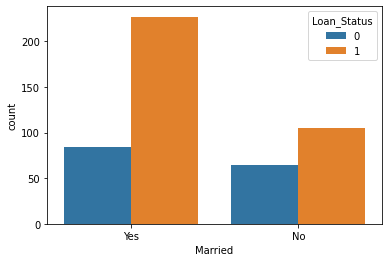

In [21]:
sns.countplot(data=df,x='Married',hue='Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='count'>

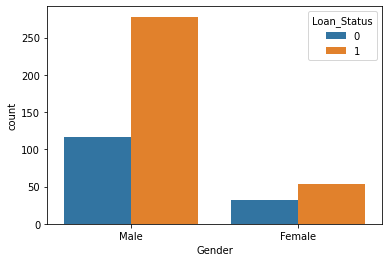

In [22]:
sns.countplot(data=df,x='Gender',hue='Loan_Status')

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

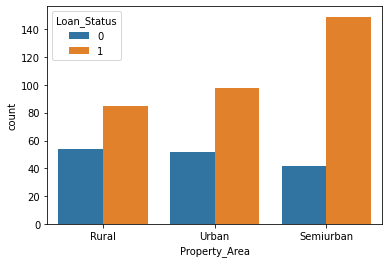

In [23]:
sns.countplot(data=df,x='Property_Area',hue='Loan_Status')

In [24]:
df.replace({'Education':{'Graduate':2,'Not Graduate':0}},inplace=True)

In [25]:
df.replace({'Gender':{'Female':0,'Male':1},'Married':{'Yes':1,'No':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,2,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,2,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,2,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,2,1,5417,4196.0,267.0,360.0,1.0,2,1


In [27]:
x=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)

In [28]:
y=df['Loan_Status']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [30]:
cr=df.corr()

<AxesSubplot:>

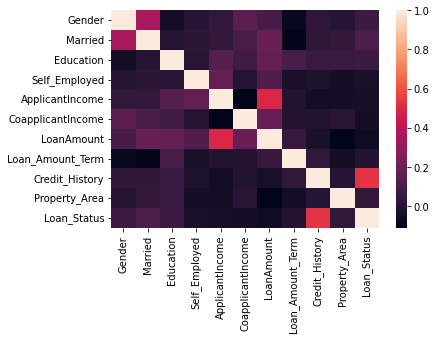

In [31]:
sns.heatmap(cr)

In [32]:
classi=svm.SVC(kernel='linear')

In [33]:
classi.fit(x_train,y_train)

SVC(kernel='linear')

In [34]:
 x_train_pred=classi.predict(x_train)

In [35]:
train_acc=accuracy_score(x_train_pred,y_train)

In [36]:
train_acc

0.7604166666666666

In [37]:
x_test_pred=classi.predict(x_test)  

In [38]:
accuracy_score(x_test_pred,y_test)

0.78125

In [39]:
inpdata=()
inpasnumpy=np.asarray(inpdata)

In [40]:
inpasnumpy=inpasnumpy.reshape(1,-1)

In [41]:
classi.predict(inpasnumpy)

C:\Users\subha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


ValueError: Found array with 0 feature(s) (shape=(1, 0)) while a minimum of 1 is required.